# FMCA interface

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [2]:
dim = 2
N = 10000
dtilde = 3
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.SampletTree(pts, dtilde)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
spts = pts[:, ST.indices()]

elapsed time samplet tree construction:  0.03738975524902344 sec.
------------------- Cluster tree metrics -------------------
dimension:                    2
number of points:             10000
cluster splitting method:     CardinalityBisection
bounding box diameter:        11.2749
number of clusters:           1023
fill distance:                0.976365
separation radius:            6.33111e-05
min cluster discrepancy:      2.87e-05
max cluster discrepancy:      1.08e-01
mean cluster discrepancy:     6.10e-03
pt. mindist distribution:     
 4.12e-06|****************************************
 1.24e-05|**
 2.06e-05|*
 2.88e-05|*
 3.71e-05|*
 4.53e-05|*
 5.36e-05|*
 6.18e-05|*
 7.00e-05|*
 7.83e-05|*
 8.65e-05|*
 9.48e-05|
 1.03e-04|
 1.11e-04|*
 1.19e-04|*
discrepancy distribution:     
 3.77e-05|*
 6.54e-05|*
 1.13e-04|*
 1.96e-04|*
 3.39e-04|**
 5.87e-04|**
 1.02e-03|*********
 1.76e-03|****************************************
 3.05e-03|***********************
 5.28e-03|************
 

### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [3]:
start = time.time()
data = 2 * np.array(np.random.rand(N,10), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  0.008307933807373047 sec.
relative error:  5.466459554741223e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

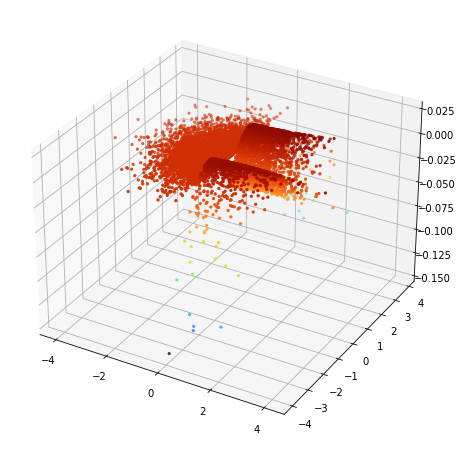

In [4]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(spts[0,:], spts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()

### transform a random signal into the samplet basis
(Basis elements can be retrieved by inverse transforming unit vectors)

In [5]:
dim = 1
N = 100000
dtilde = 6
pts = 2 * np.pi * np.array(np.random.rand(dim, N), order='F')
ST = FMCA.SampletTree(pts, dtilde)
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order and make it an array
spts = pts[:, ST.indices()].flatten()

------------------- Cluster tree metrics -------------------
dimension:                    1
number of points:             100000
cluster splitting method:     CardinalityBisection
bounding box diameter:        6.28e+00
number of clusters:           16383
fill distance:                6.78e-04
separation radius:            2.87e-10
min cluster discrepancy:      2.26e-09
max cluster discrepancy:      1.50e-03
mean cluster discrepancy:     4.68e-05
pt. mindist distribution:     
 1.30e-14|*****************************************
 3.89e-14|**********
 6.48e-14|***
 9.07e-14|*
 1.17e-13|*
 1.43e-13|*
 1.68e-13|*
 1.94e-13|*
 2.20e-13|*
 2.46e-13|*
 2.72e-13|*
 2.98e-13|
 3.24e-13|
 3.50e-13|
 3.76e-13|
discrepancy distribution:     
 3.54e-09|*
 8.64e-09|*
 2.11e-08|*
 5.16e-08|*
 1.26e-07|*
 3.08e-07|*
 7.54e-07|**
 1.84e-06|****
 4.50e-06|********
 1.10e-05|********************
 2.69e-05|****************************************
 6.58e-05|***********************************
 1.61e-04|***

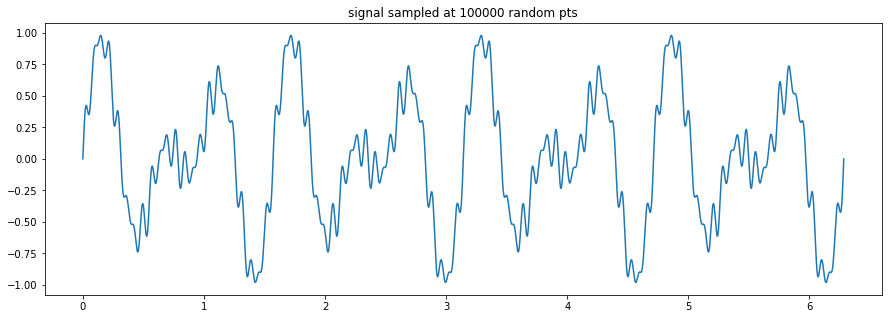

In [6]:
data = np.sin(10 * spts) * np.cos(2 * spts) + 0.2 * np.sin(80 * spts) * np.cos(12 * spts)
plt.figure(figsize=(15,5))
plt.plot(spts,data)
plt.axis('tight')
plt.title('signal sampled at 100000 random pts')
plt.show()

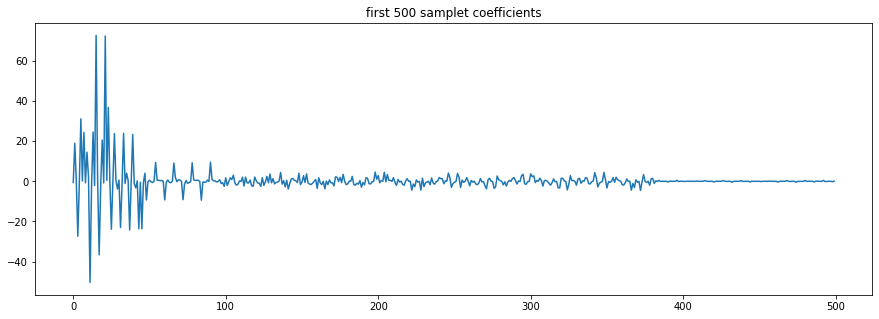

In [7]:
Tdata = FMCA.sampletTransform(ST, data)
plt.figure(figsize=(15,5))
plt.plot(Tdata[0:500])
plt.axis('tight')
plt.title('first 500 samplet coefficients')
plt.show()

In [8]:
cov = FMCA.CovarianceKernel("exponential", 2)
start = time.time()
SKC = FMCA.SampletKernelCompressor(ST, cov, pts, 0.8, 1e-5)
stop = time.time()
print('elapsed time kernel compression:  ', stop - start, 'sec.')

elapsed time kernel compression:  mpole deg:                    6
dtilde:                       6
eta:                          8.00e-01
thres:                        1.00e-05
anz:                          7.00e+00
compression error:            1.29e-07
 2.3247768878936768 sec.


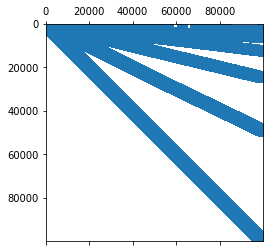

In [10]:
import scipy
K = SKC.matrix()
plt.spy(K)
plt.show() 